In [1]:
import pickle
import pandas as pd
import numpy as np

import shap
from sklearn.inspection import permutation_importance

import matplotlib.pyplot as plt

In [2]:
springer_journals = pd.read_csv('../../scrapers/springer/journals_database.csv')

labels = []
with open('../support_files/journals_labels.txt', 'r') as f:
    for line in f:
        labels.append(line[:-1])
labels = [l[:73] for l in labels]

tfidf_words = []
with open('../support_files/tfidf_words.txt', 'r') as f:
    for line in f:
        tfidf_words.append(line[:-1])
        
tfidf = pickle.load(open('../support_files/tfidf.vectorizer', 'rb'))
model = pickle.load(open('../catboost.model', 'rb'))

In [3]:
X, y = pd.read_pickle("../data/X.pkl"), pd.read_pickle("../data/y.pkl")

### Feature Importances

In [6]:
feature_importances = pd.DataFrame({'feature': model.feature_names_, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importances.head(100))

               feature  importance
376              steel    2.888946
168           friction    2.872815
15               alloy    2.716157
444  words_in_abstract    2.547561
263      nanoparticles    2.464437
365                sol    2.444340
267                 nm    1.880120
85           corrosion    1.445441
409             tissue    1.320221
301           prepared    1.272738
433               wear    1.220185
174                gel    1.217113
38            behavior    1.192108
387            surface    1.180297
50                cell    1.168958
336             result    1.090750
154               film    1.061354
383            studied    1.012837
384              study    0.940908
350              shown    0.884263
250     microstructure    0.868082
286        performance    0.818120
60             coating    0.804990
394        temperature    0.771686
378           strength    0.753089
348               show    0.733721
112             device    0.726126
130           electr

### SHAP (SHapley Additive exPlanations)

In [8]:
%%time
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

CPU times: user 2min 28s, sys: 25.9 s, total: 2min 53s
Wall time: 3min 46s


In [9]:
pickle.dump(shap_values, open('../support_files/shap_explainer.pkl', 'wb'))

#### Expainer results analyze

In [3]:
shap_values = pickle.load(open('../support_files/shap_explainer.pkl', 'rb'))

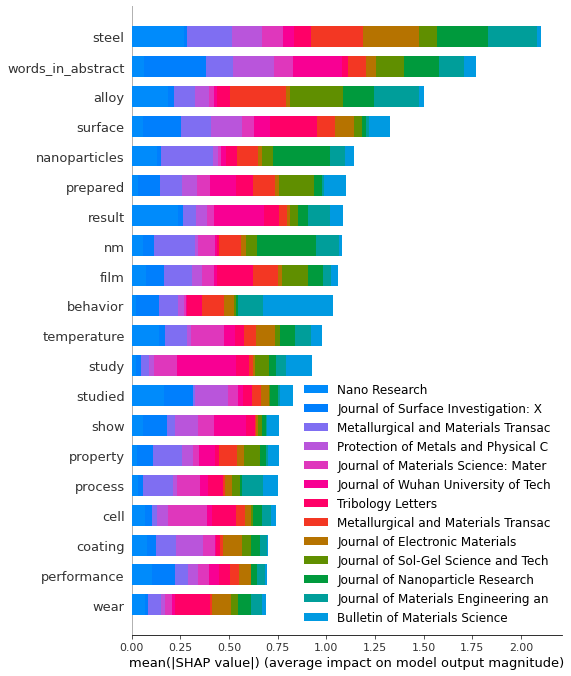

In [14]:
shap.initjs()
shap.summary_plot(shap_values, X, class_names=[l[:35] for l in labels])

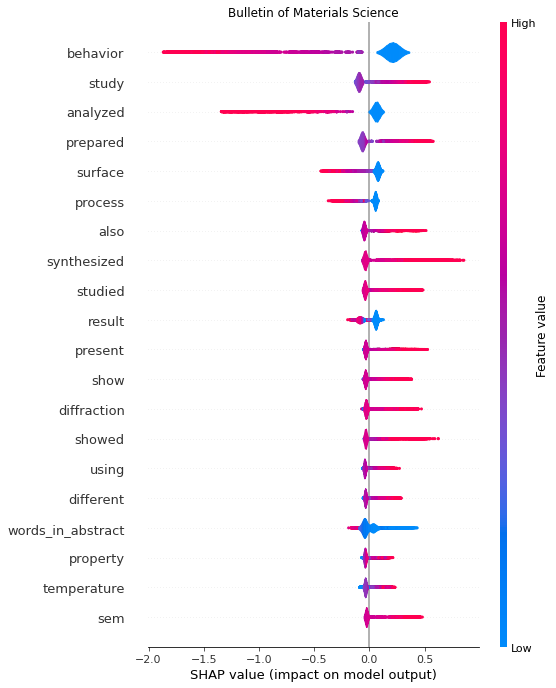

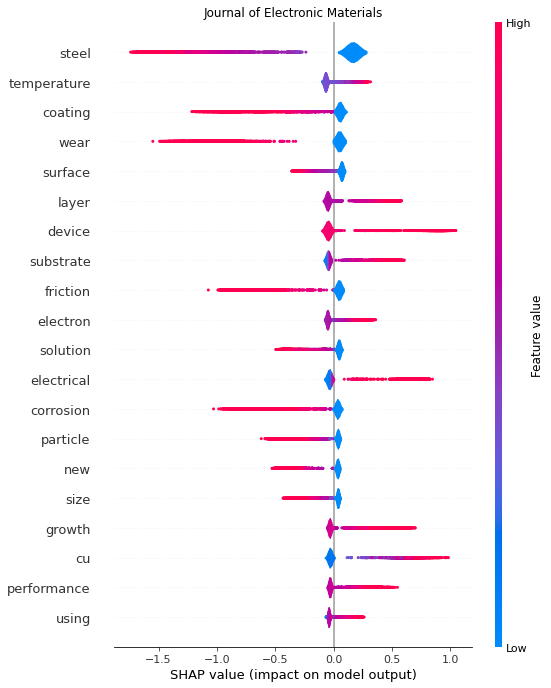

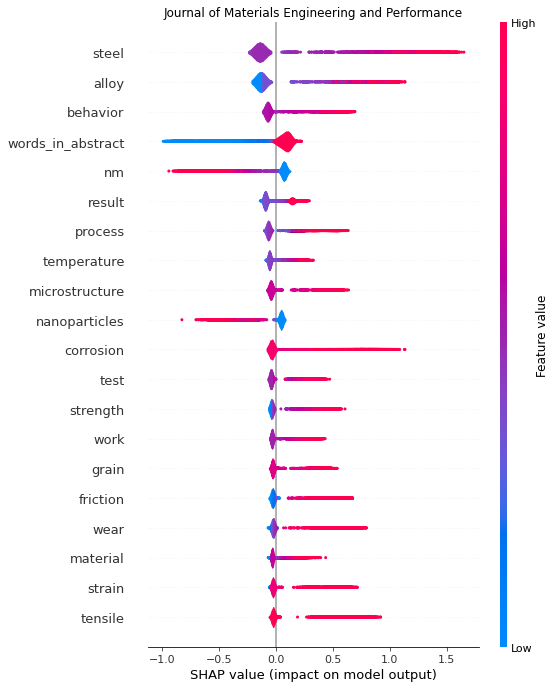

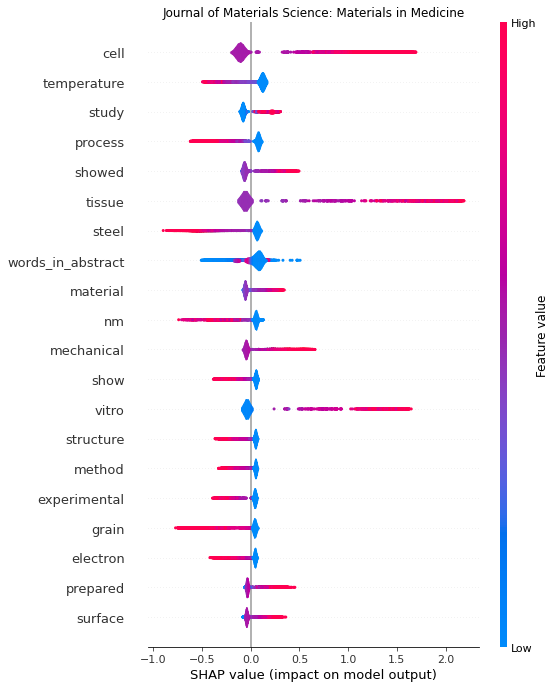

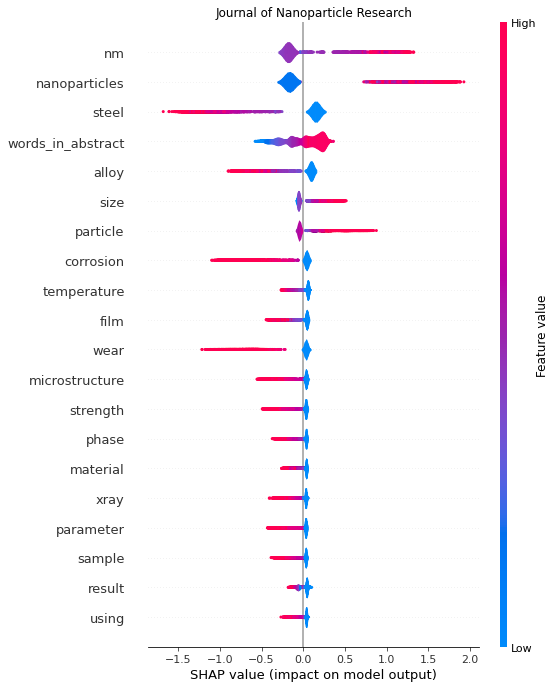

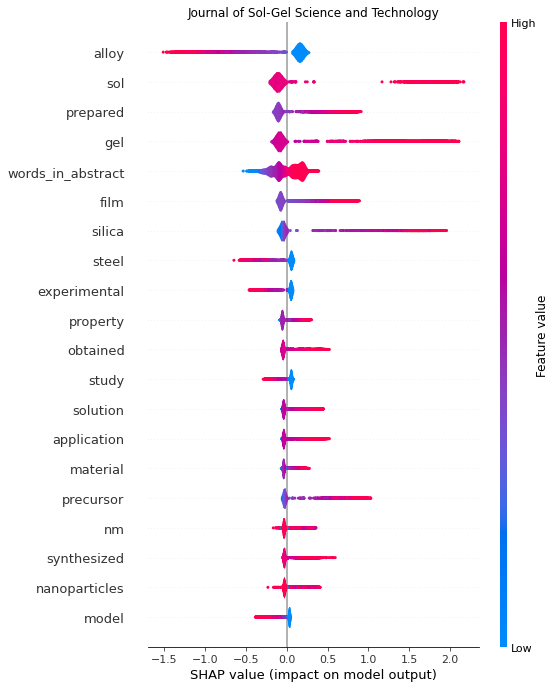

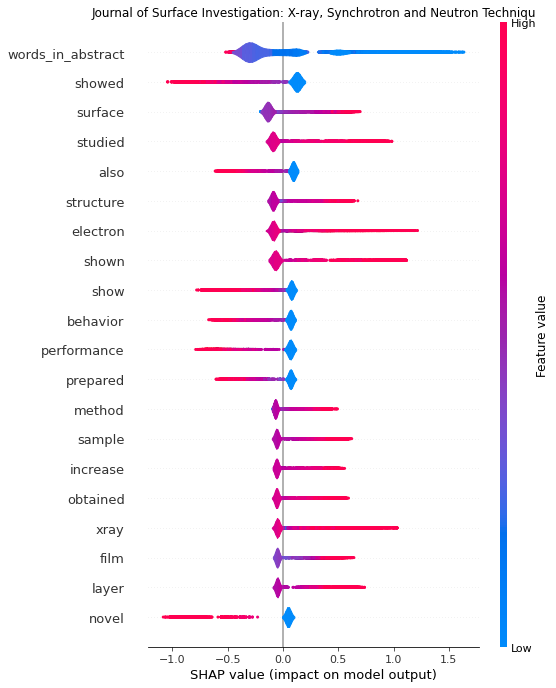

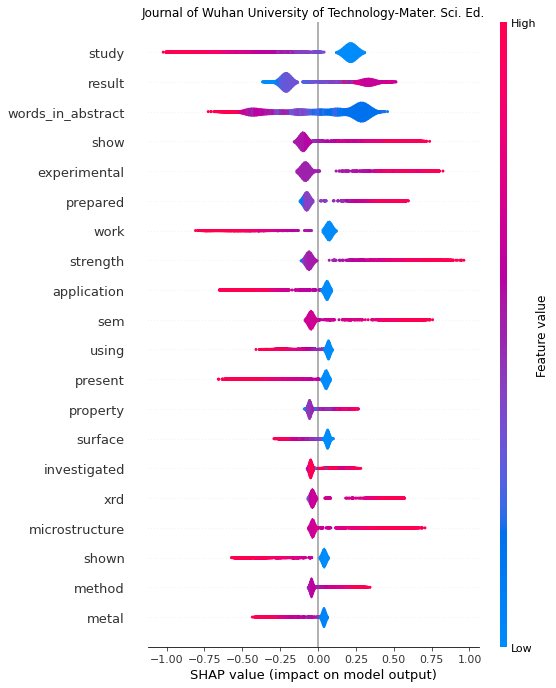

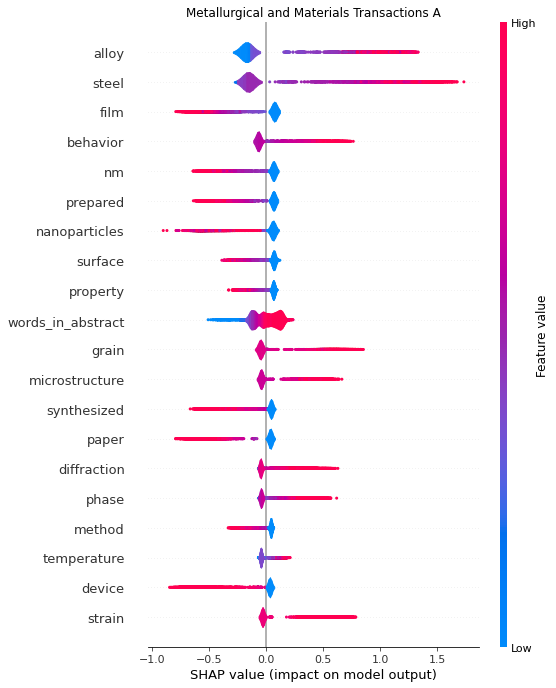

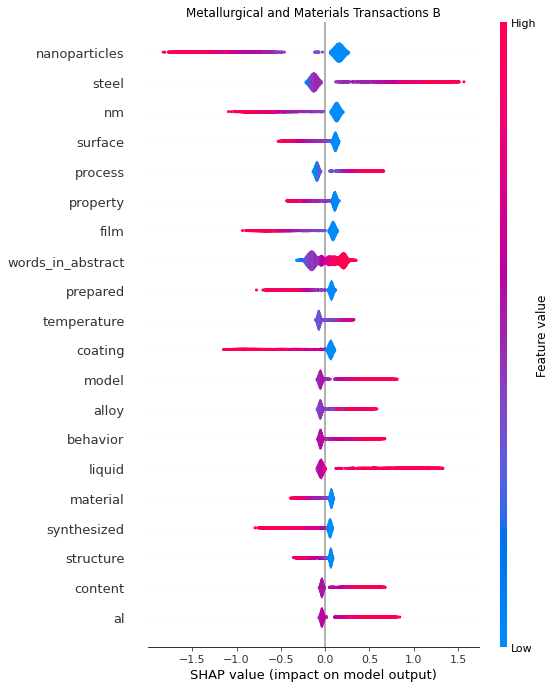

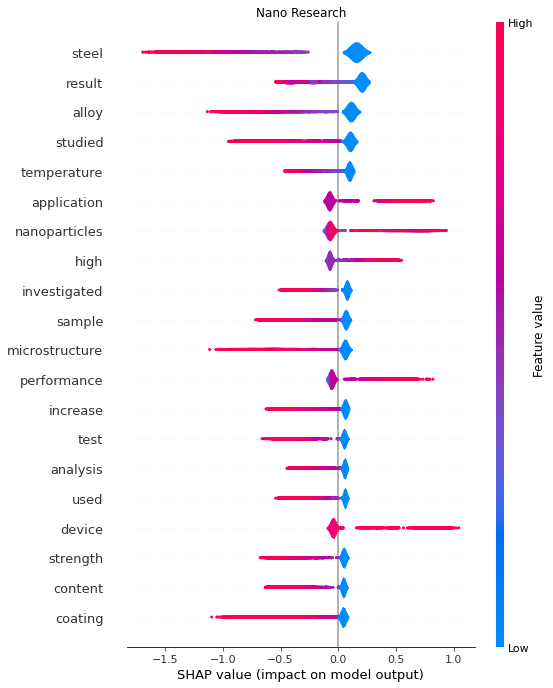

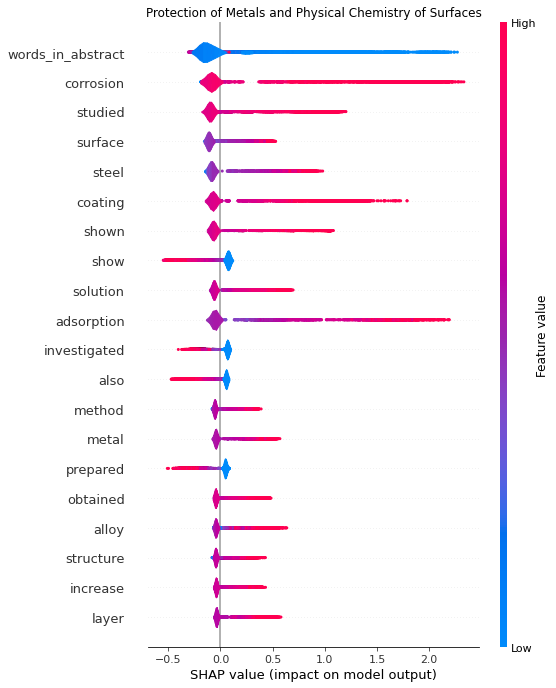

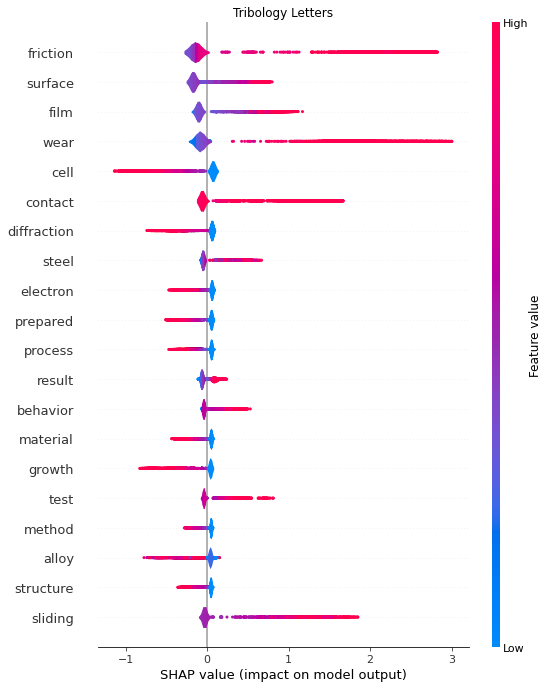

In [13]:
for i, label in enumerate(labels):
    shap.initjs()
    shap.summary_plot(shap_values[i], X, plot_type='violin', show=False)
    plt.title(label)
    plt.show()

In [26]:
class Journal:
    def __init__(self, title, should_publish):
        title = self.title
        should_publish = self.should_publish

In [27]:
Q1 = ['A', 'B', 'C']
IF = {'A': 1, 'B':2, 'C': 3}

Journal.title = 'C'

if Journal.title in Q1 and IF[Journal.title] is IF[max(IF, key=IF.get)]:
    Journal.should_publish = True

In [29]:
Journal.should_publish

True